In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import traffic as t

import os
import datetime


In [ ]:
datapath = '../../Data'

In [51]:
fuel_train = pd.read_parquet(os.path.join(datapath, "fuel_train.parquet"))
flightlist_train = pd.read_parquet(os.path.join(datapath, "flightlist_train.parquet"))

fuel_test = pd.read_parquet(os.path.join(datapath, "fuel_rank_submission.parquet"))
flightlist_test = pd.read_parquet(os.path.join(datapath, "flightlist_rank.parquet"))

In [52]:
# Pre processing

# Prepare training set
fuel_train['hrs'] = (fuel_train['end'] - fuel_train['start']).dt.seconds / 3600
fuel_train['kg/hr'] = fuel_train['fuel_kg'] / fuel_train['hrs']

fuel_train = fuel_train.join(flightlist_train.set_index('flight_id'), on='flight_id')

# Prepare test set
fuel_test['hrs'] = (fuel_test['end'] - fuel_test['start']).dt.seconds / 3600
fuel_test['kg/hr'] = fuel_test['fuel_kg'] / fuel_test['hrs']

fuel_test = fuel_test.join(flightlist_test.set_index('flight_id'), on='flight_id')


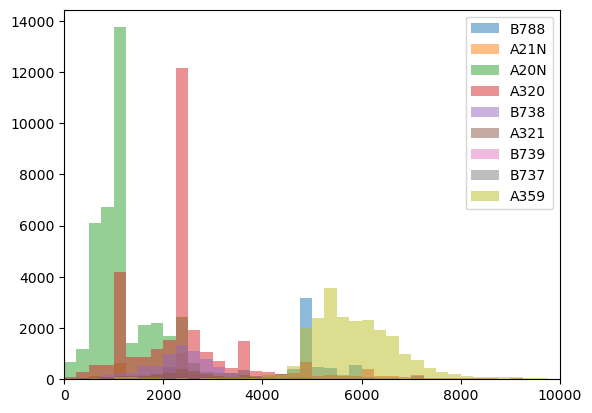

In [53]:
f, a = plt.subplots()

acs = ['B788', 'A21N', 'A20N', 'A320', 'B738', 'A321', 'B739', 'B737', 'A359']
# acs = fuel_train['aircraft_type'].unique()

maxbin = max(fuel_train['kg/hr'])

for ac in acs:
    subset = fuel_train[fuel_train['aircraft_type'] == ac]

    a.hist(subset['kg/hr'], alpha = 0.5, bins = range(0, round(maxbin) + 250, 250))

a.set_xlim([0, 10000])
a.legend(acs)

In [59]:
ackey = fuel_train['aircraft_type'].unique()

meanburns = {}

for (i, ac) in enumerate(ackey):
    meanburns[ac] = np.mean(fuel_train['kg/hr'])



In [68]:
fuel_test['kg/hr'] = fuel_test['aircraft_type'].map(lambda x: meanburns[x])
fuel_test['fuel_kg'] = fuel_test['kg/hr'] * fuel_test['hrs']

submission = fuel_test[['idx', 'flight_id', 'start', 'end', 'fuel_kg']]

In [69]:
submission.to_parquet('friendly-raccoon_v1.parquet')